<a href="https://colab.research.google.com/github/prabindebnath25/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Solutoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# loading and general inspection of the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.nunique()        # U nique element in each columns


id                                48884
name                              47894
host_id                           37455
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19046
longitude                         14715
room_type                             3
price                               673
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.shape  #shape of the dataframe

(48884, 16)

In [ ]:
# For Nan Values in column reviews_per_month,replacing Nan with 0
df['reviews_per_month'].fillna(0,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

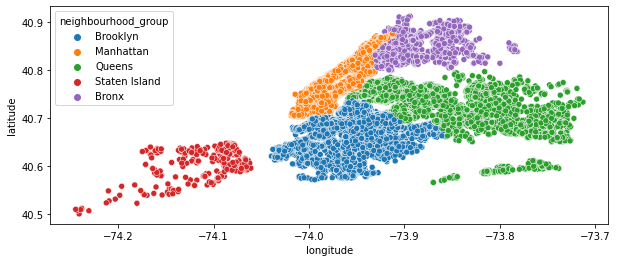

In [ ]:
# Wwe plot the longitude and latitude 
sns.scatterplot(x= df.longitude, y=df.latitude ,hue= df.neighbourhood_group)

#What can we learn about different hosts and areas?

In [ ]:
df.neighbourhood_group.value_counts() #there are 5 neighbourhood group

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Number of hosts in different neighbourhoods

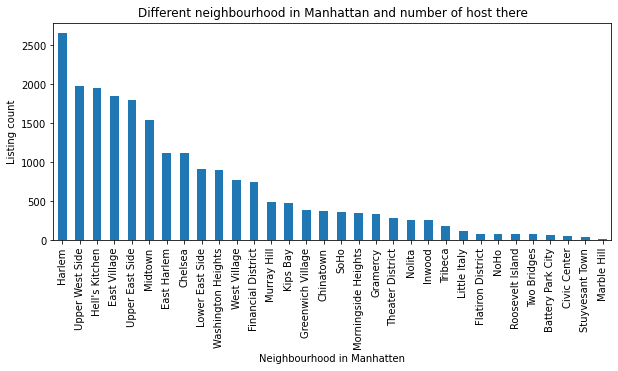

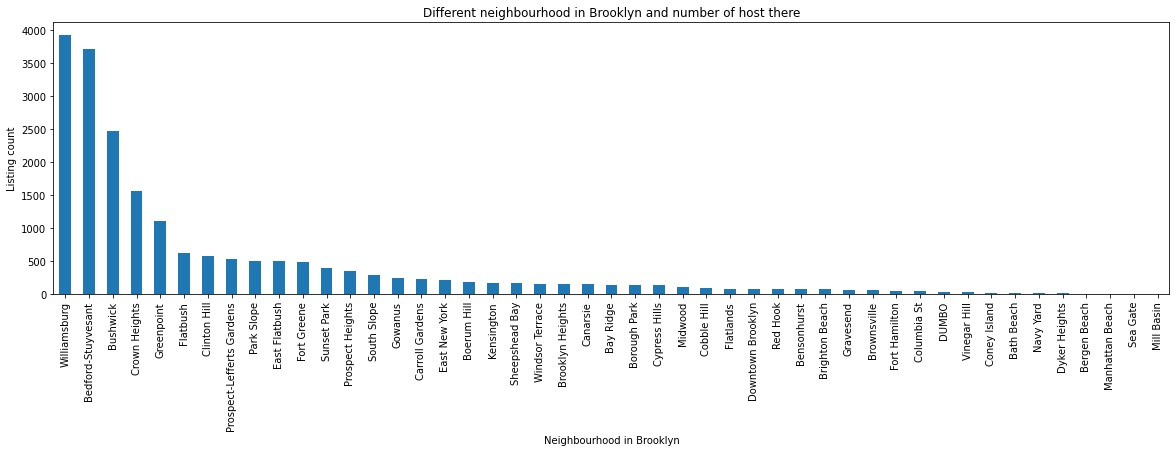

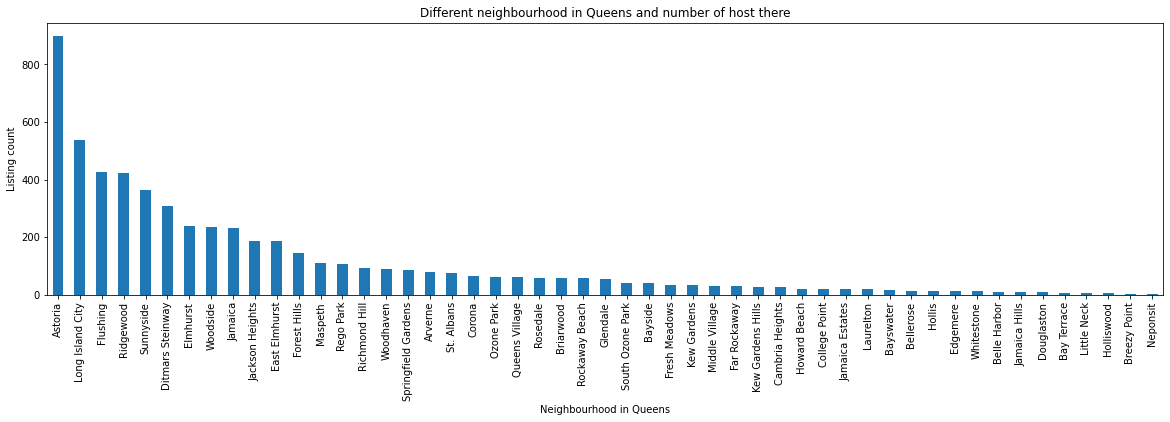

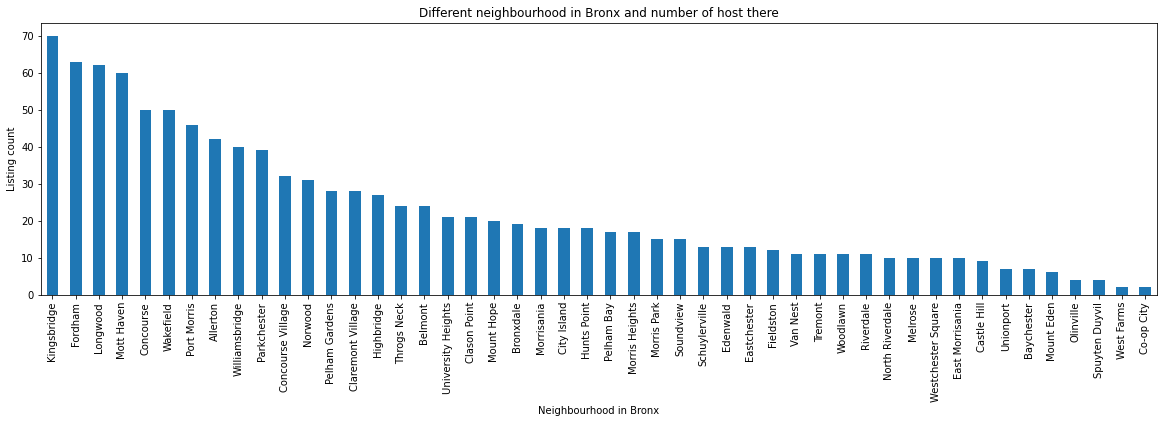

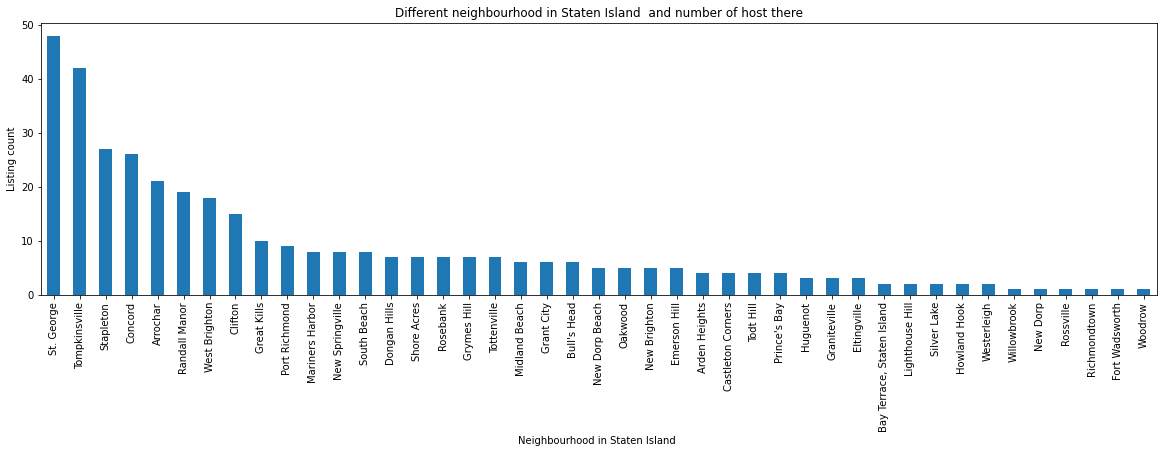

In [ ]:
df[df['neighbourhood_group'] == 'Manhattan'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Different neighbourhood in Manhattan and number of host there')
plt.xlabel('Neighbourhood in Manhatten')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Brooklyn'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Brooklyn and number of host there')
plt.xlabel('Neighbourhood in Brooklyn')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Queens'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Queens and number of host there')
plt.xlabel('Neighbourhood in Queens')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Bronx'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Bronx and number of host there')
plt.xlabel('Neighbourhood in Bronx')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Staten Island'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Staten Island  and number of host there')
plt.xlabel('Neighbourhood in Staten Island ')
plt.ylabel('Listing count')
plt.show()

##top 10 hosts in different neighbourhood groups by number of bookings

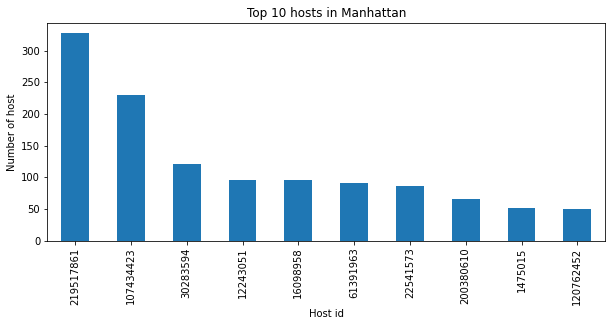

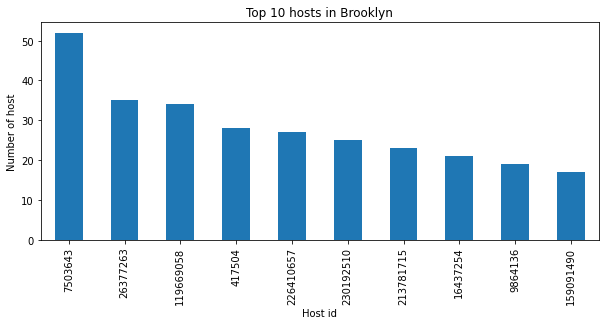

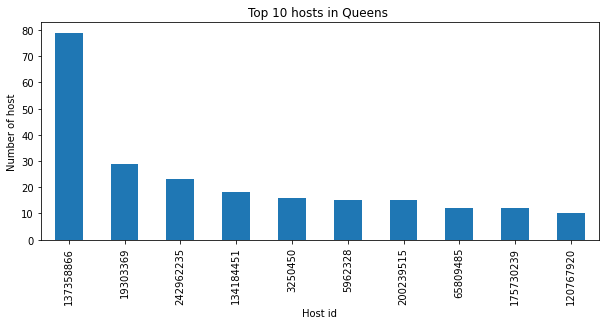

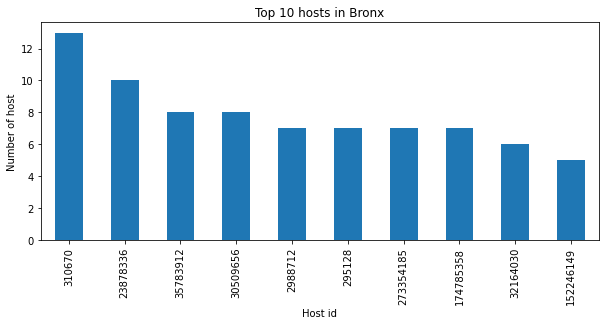

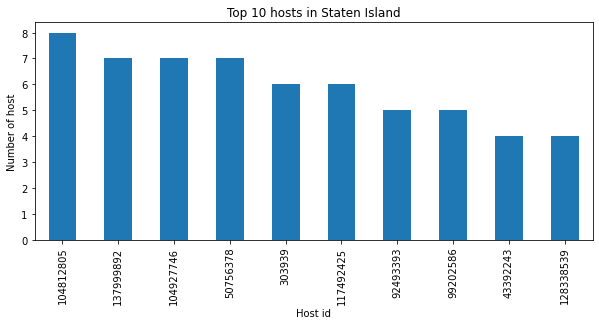

In [ ]:
plt.rcParams['figure.figsize'] = [10, 4]
df[df['neighbourhood_group'] == 'Manhattan']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Manhattan')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Brooklyn']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Brooklyn')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Queens']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Queens ')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Bronx']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Bronx')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Staten Island']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Staten Island')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()


In [ ]:
# Top 10 hosts in entire database

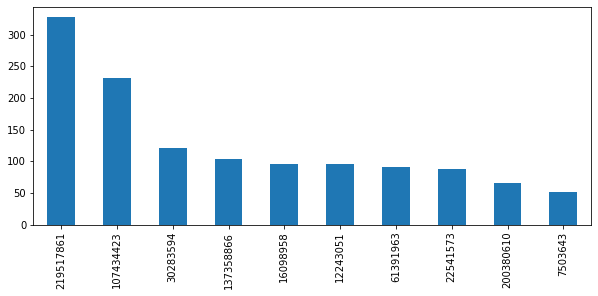

In [ ]:
df.host_id.value_counts()[:10].plot(kind = 'bar')

# What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
len(df[df['price'] == 0])        #there are few listings with zero price

11

In [ ]:
# we drop the columns with price 0
df.drop(df[df['price'] == 0].index, axis=0, inplace= True)

In [ ]:
len(df[df['price'] == 0])   # Now we have no rows with zero prices

0

In [ ]:
df.price.describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Prices in different neighbourhood

In [ ]:
# First we find out how expencive neighbourhood group are
df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.884903
Brooklyn         124.438915
Staten Island    114.812332
Queens            99.517649
Bronx             87.577064
Name: price, dtype: float64

Text(0, 0.5, 'average price')

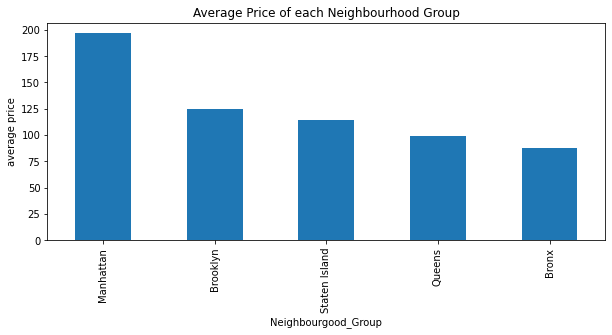

In [ ]:
# We plot the above data
df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('Average Price of each Neighbourhood Group')
plt.xlabel('Neighbourgood_Group')
plt.ylabel('average price')

Text(0.5, 0, 'Neighbourhood Group')

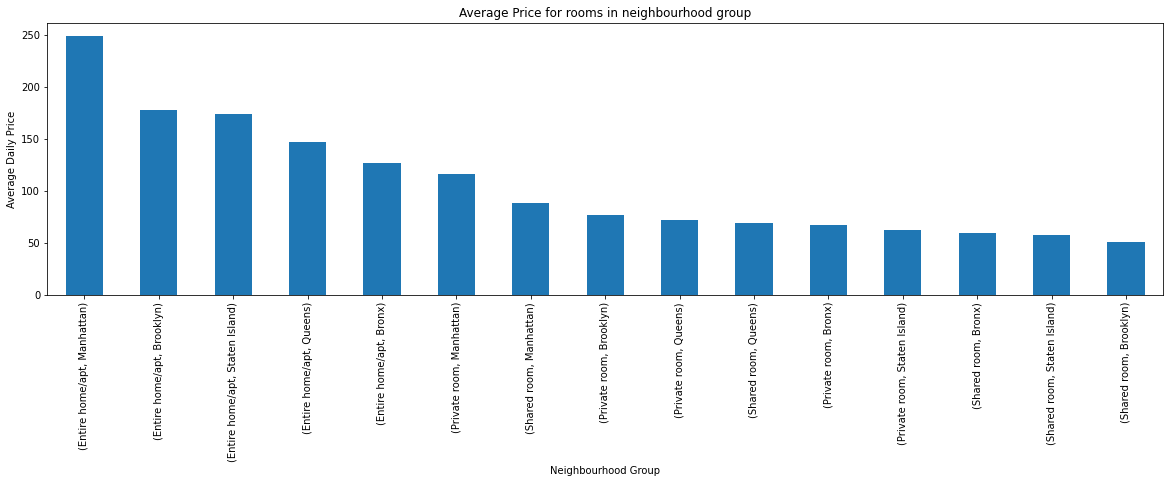

In [ ]:
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending= False)
plt.rcParams['figure.figsize'] = [20,5]
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')

In [ ]:
df1

room_type        neighbourhood_group
Entire home/apt  Manhattan              249.257994
                 Brooklyn               178.346202
                 Staten Island          173.846591
                 Queens                 147.050573
                 Bronx                  127.506596
Private room     Manhattan              116.776622
Shared room      Manhattan               88.977083
Private room     Brooklyn                76.545428
                 Queens                  71.762456
Shared room      Queens                  69.020202
Private room     Bronx                   66.890937
                 Staten Island           62.292553
Shared room      Bronx                   59.800000
                 Staten Island           57.444444
                 Brooklyn                50.773723
Name: price, dtype: float64

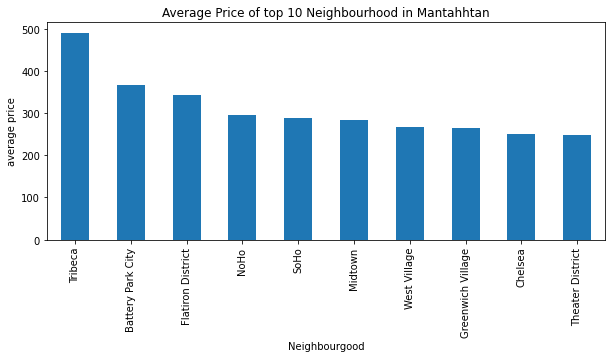

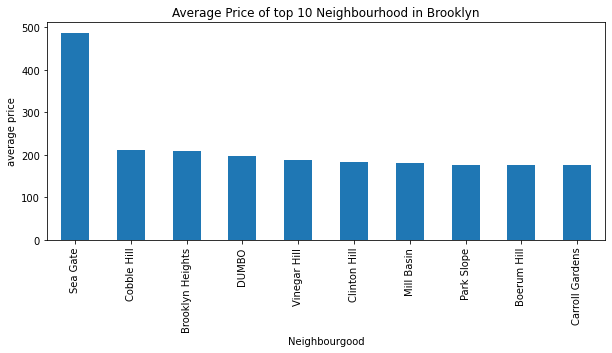

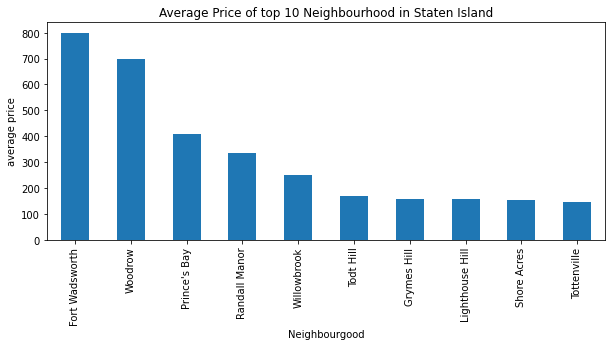

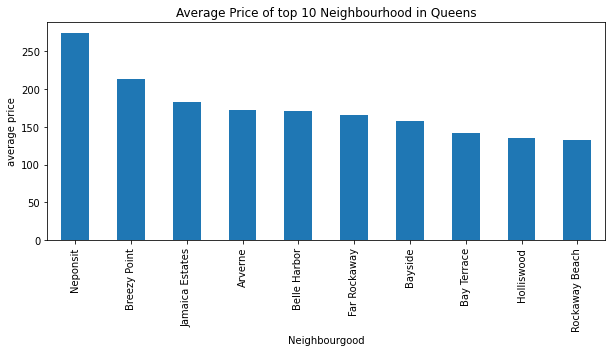

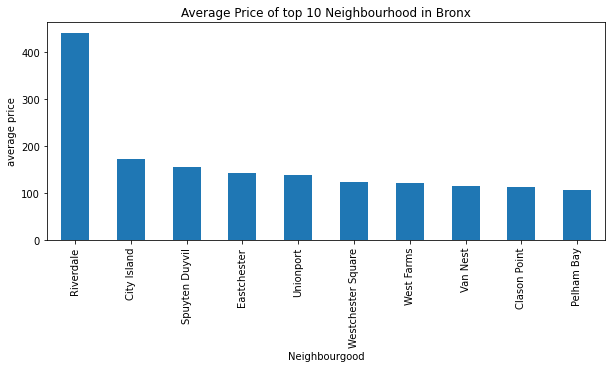

In [ ]:
# Now we check most expencive neighbourhood in each neighbourhood_group
df[df['neighbourhood_group'] == 'Manhattan'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending= False)[:10].plot(kind = 'bar')
plt.title('Average Price of top 10 Neighbourhood in Mantahhtan')
plt.xlabel('Neighbourgood')
plt.ylabel('average price')
plt.show()


df[df['neighbourhood_group'] == 'Brooklyn'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending= False)[:10].plot(kind = 'bar')
plt.title('Average Price of top 10 Neighbourhood in Brooklyn')
plt.xlabel('Neighbourgood')
plt.ylabel('average price')
plt.show()

df[df['neighbourhood_group'] == 'Staten Island'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending= False)[:10].plot(kind = 'bar')
plt.title('Average Price of top 10 Neighbourhood in Staten Island')
plt.xlabel('Neighbourgood')
plt.ylabel('average price')
plt.show()

df[df['neighbourhood_group'] == 'Queens'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending= False)[:10].plot(kind = 'bar')
plt.title('Average Price of top 10 Neighbourhood in Queens')
plt.xlabel('Neighbourgood')
plt.ylabel('average price')
plt.show()

df[df['neighbourhood_group'] == 'Bronx'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending= False)[:10].plot(kind = 'bar')
plt.rcParams['figure.figsize'] = [10, 4]
plt.title('Average Price of top 10 Neighbourhood in Bronx')
plt.xlabel('Neighbourgood')
plt.ylabel('average price')
plt.show()

## Neighbourgood and reviews

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

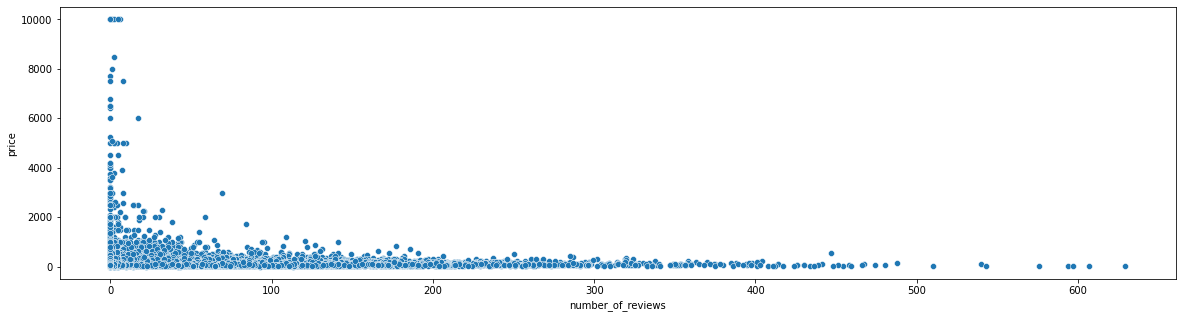

In [ ]:
sns.scatterplot(x= df.number_of_reviews, y = df.price )  # We can see where price is low number of coment is more

## Room type and price

In [ ]:
df.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64

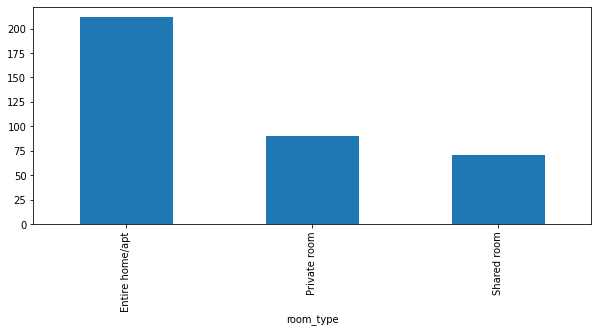

In [ ]:
df.groupby(['room_type'])['price'].mean().plot(kind= 'bar')

#Which hosts are the busiest and why?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

In [ ]:
# We check top 20 hosts against nuumber of listings and make a dataframe with them
df.host_name.value_counts()[:5]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

In [ ]:
print("top 5 host name with maximum property hosted are  ", list(df.host_name.value_counts()[:5].index))

top 5 host name with maximum property hosted are   ['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex']


# Correlation

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:

df1 = df[['host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [ ]:
df1.corr(method= 'pearson')

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.209752,0.154949,0.203434
latitude,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.018719,0.019518,-0.010942
longitude,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.138435,-0.114715,0.082669
price,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.050531,0.057462,0.081847
minimum_nights,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.124870,0.127962,0.144275
number_of_reviews,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.589311,-0.072385,0.171975
reviews_per_month,0.209752,-0.018719,0.138435,-0.050531,-0.124870,0.589311,1.000000,-0.047322,0.163664
calculated_host_listings_count,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.047322,1.000000,0.225712
availability_365,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.163664,0.225712,1.000000


correlation heatmap


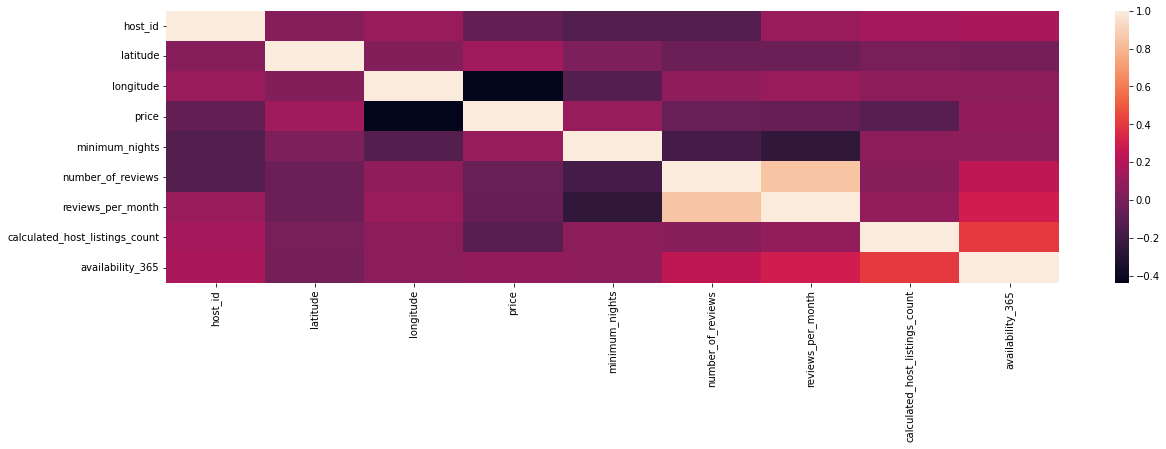

<Figure size 864x1296 with 0 Axes>

In [ ]:
sns.heatmap(df1.corr(method= 'spearman'))
plt.figure(figsize=(12,18))
print("correlation heatmap")